# Purpose
Predict survivability for titanic passengers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Main dataset

In [3]:
filepath = 'C:/Users/nowic/Desktop/home_tasks/pets/titanic/raw_data/'

titanic_train = pd.read_csv(f'{filepath}train.csv')
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## describe()

In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Survived

([<matplotlib.patches.Wedge at 0x2c3a510dc10>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Dead'),
  Text(0.40328162306972465, -1.0555870084906542, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62% (549)'),
  Text(0.2248384270211739, -0.5885131109284178, '38.38% (342)')])

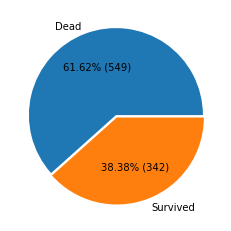

In [5]:
surv_count = titanic_train.groupby('Survived').agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=surv_count['Count'],
        explode=[0, 0.03],
        labels=['Dead', 'Survived'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Survived').size().sum()))

## Embarked

([<matplotlib.patches.Wedge at 0x2c3a5899190>,
 [Text(0.9242054877476974, 0.6237541313827435, 'C'),
  Text(0.12386146848567248, 1.1080989742006682, 'Q'),
  Text(-0.7225602849401345, -0.8491946977149776, 'S')],
 [Text(0.5097635649908824, 0.3440437585653697, '18.90% (168)'),
  Text(0.06831820907505701, 0.6111936046039559, '8.66% (77)'),
  Text(-0.3985422199445584, -0.4683899005333732, '72.44% (644)')])

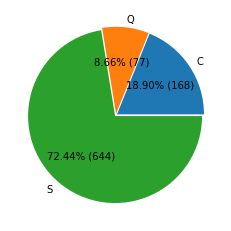

In [6]:
embarked_count = titanic_train.groupby('Embarked', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=embarked_count['Count'],
        explode=[0.015, 0.015, 0.015],
        labels=embarked_count['Embarked'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Embarked').size().sum()))

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

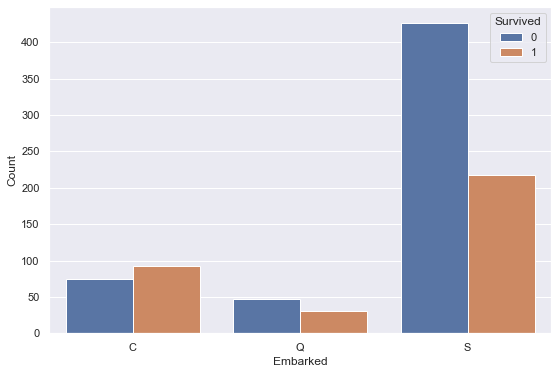

In [7]:
embarked_surv = titanic_train.groupby(['Survived', 'Embarked'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.set(rc={'figure.figsize': (9, 6)})
sns.barplot(x='Embarked', y='Count', hue='Survived', data=embarked_surv)

## Age

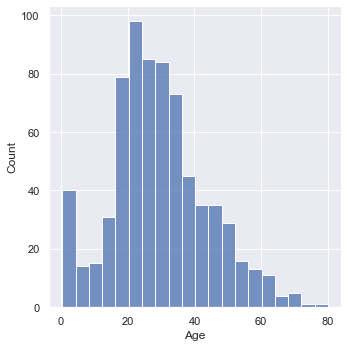

In [8]:
sns.displot(data=titanic_train['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

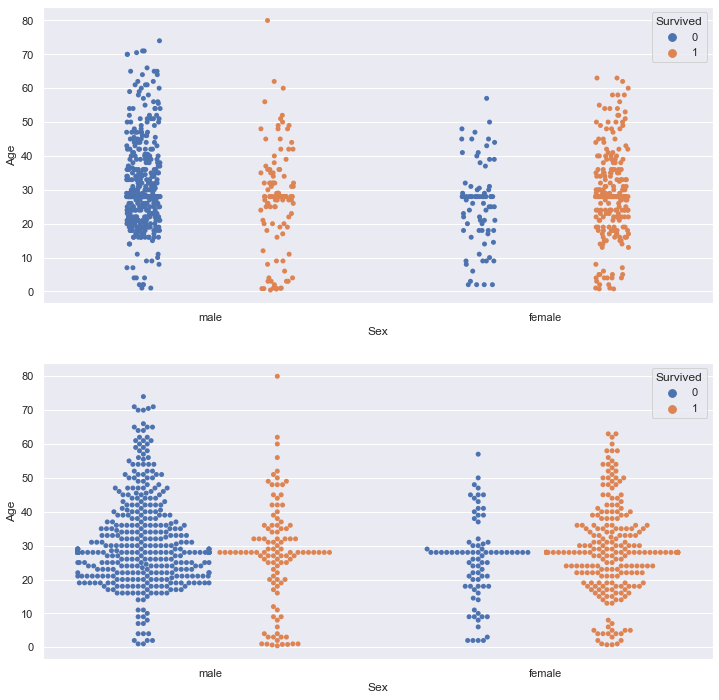

In [27]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
sns.stripplot(x='Sex', y='Age', hue='Survived', dodge=True, data=titanic_train, ax=axes[0])
sns.swarmplot(x='Sex', y='Age', hue='Survived', dodge=True, data=titanic_train, ax=axes[1])

## Fare

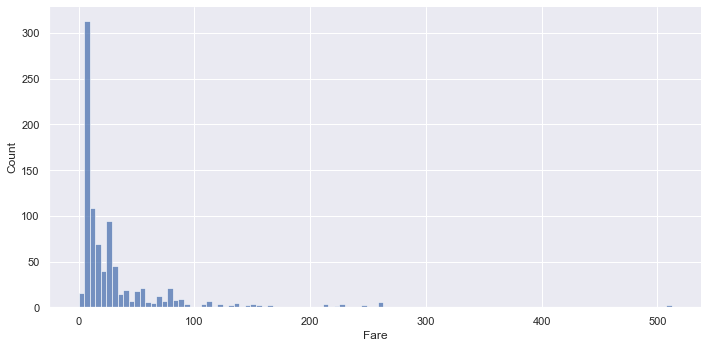

In [10]:
sns.displot(data=titanic_train['Fare'], aspect=2)

## SibSp

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

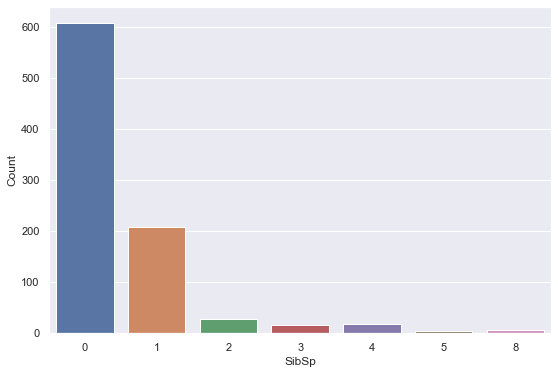

In [11]:
sibsp_count = titanic_train.groupby('SibSp', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
# sns.set(rc={'figure.figsize': (12, 12)})
#
# plt.pie(x=sibsp_count['Count'],
#         explode=[0, 0, 0, 0, 0, 0.2, 0.2],
#         labels=sibsp_count['SibSp'],
#         autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('SibSp').size().sum()))
sns.barplot(x=sibsp_count['SibSp'], y=sibsp_count['Count'])

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

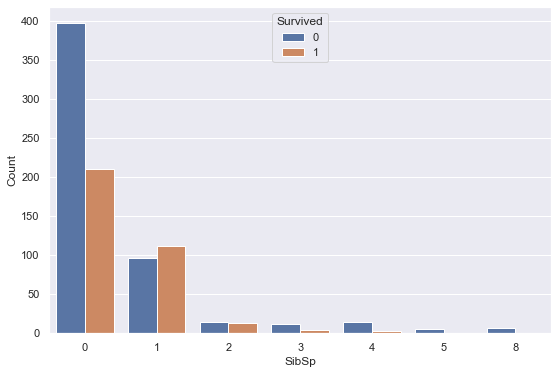

In [12]:
sibsp_surv = titanic_train.groupby(['Survived', 'SibSp'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.set(rc={'figure.figsize': (9, 6)})
sns.barplot(x='SibSp', y='Count', hue='Survived', data=sibsp_surv)

## Parch

<AxesSubplot:xlabel='Parch', ylabel='Count'>

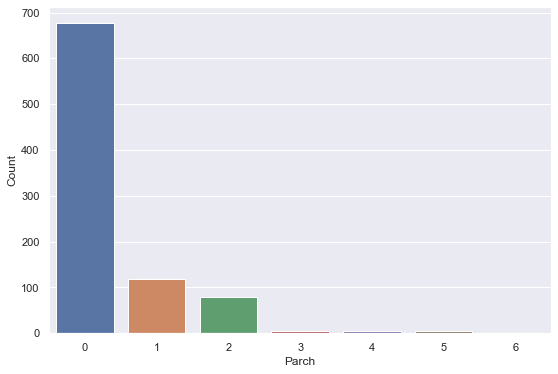

In [13]:
parch_count = titanic_train.groupby('Parch', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
# sns.set(rc={'figure.figsize': (12, 12)})
#
# plt.pie(x=parch_count['Count'],
#         explode=[0, 0, 0, 0, 0, 0.2, 0.2],
#         labels=parch_count['Parch'],
#         autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Parch').size().sum()))
sns.barplot(x=parch_count['Parch'], y=parch_count['Count'])

<AxesSubplot:xlabel='Parch', ylabel='Count'>

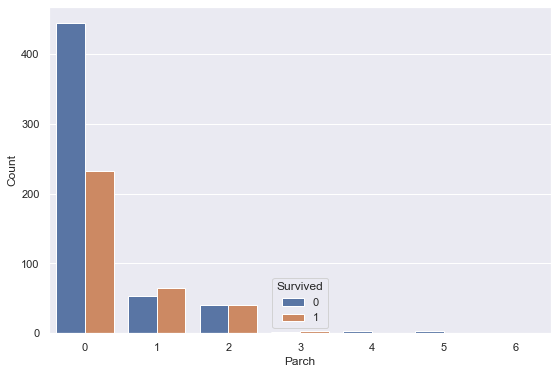

In [14]:
parch_surv = titanic_train.groupby(['Survived', 'Parch'], as_index=False)\
        .agg({'Name': 'count'})\
        .rename(columns={'Name': 'Count'})

sns.set(rc={'figure.figsize': (9, 6)})
sns.barplot(x='Parch', y='Count', hue='Survived', data=parch_surv)

## Sex

([<matplotlib.patches.Wedge at 0x2c3a6fe6eb0>,
 [Text(0.4986536668583928, 0.9972810639577386, 'female'),
  Text(-0.4986535734861991, -0.9972811106450598, 'male')],
 [Text(0.27504215705642293, 0.5500698245148065, '35.24% (314)'),
  Text(-0.27504210555516806, -0.5500698502661091, '64.76% (577)')])

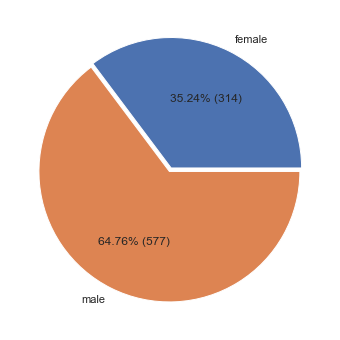

In [16]:
sex_count = titanic_train.groupby('Sex', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=sex_count['Count'],
        explode=[0.015, 0.015],
        labels=sex_count['Sex'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Pclass').size().sum()))

<AxesSubplot:xlabel='Sex', ylabel='Count'>

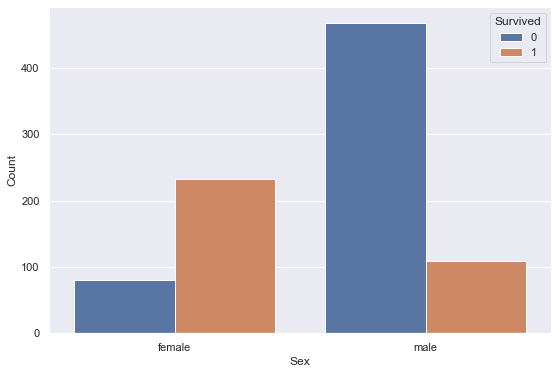

In [17]:
sex_surv = titanic_train.groupby(['Survived', 'Sex'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sns.barplot(x='Sex', y='Count', data=sex_surv, hue='Survived')

## Pclass

([<matplotlib.patches.Wedge at 0x2c3a70a7370>,
 [Text(0.8069634350229121, 0.7694381161185234, '1'),
  Text(-0.6306517240929054, 0.9195125898532582, '2'),
  Text(-0.17811219359158015, -1.1006820823898222, '3')],
 [Text(0.44509642380187525, 0.4243986021640286, '24.24% (216)'),
  Text(-0.34784826037411365, 0.5071751056141289, '20.65% (184)'),
  Text(-0.09824125476127514, -0.6071026732464042, '55.11% (491)')])

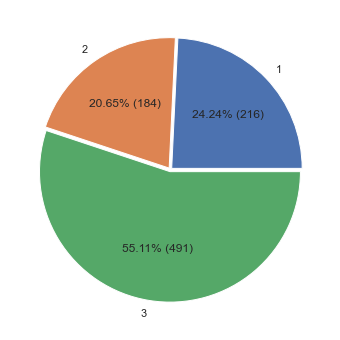

In [18]:
pclass_count = titanic_train.groupby('Pclass', as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})

plt.pie(x=pclass_count['Count'],
        explode=[0.015, 0.015, 0.015],
        labels=pclass_count['Pclass'],
        autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100)*titanic_train.groupby('Pclass').size().sum()))

<AxesSubplot:xlabel='Survived', ylabel='Count'>

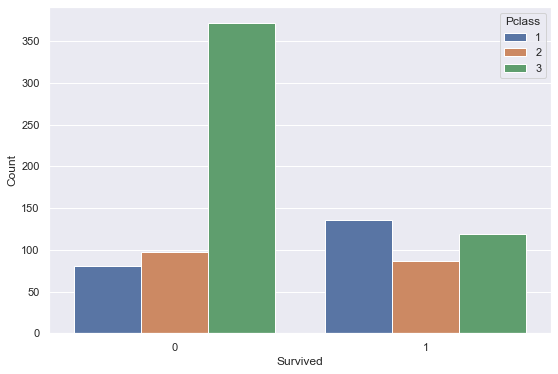

In [19]:
pclass_surv = titanic_train.groupby(['Pclass', 'Survived'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sns.barplot(x='Survived', y='Count', data=pclass_surv, hue='Pclass')

## Sex + Pclass

In [20]:
sex_pclass_surv = titanic_train.groupby(['Sex', 'Pclass', 'Survived'], as_index=False).agg({'Name': 'count'}).rename(columns={'Name': 'Count'})
sex_pclass_surv

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72
6,male,1,0,77
7,male,1,1,45
8,male,2,0,91
9,male,2,1,17


In [21]:
female_pclass_surv = sex_pclass_surv.query('Sex == "female"')
female_pclass_surv = female_pclass_surv.drop('Sex', axis=1)
female_pclass_surv

,Pclass,Survived,Count
0,1,0,3
1,1,1,91
2,2,0,6
3,2,1,70
4,3,0,72
5,3,1,72


In [22]:
male_pclass_surv = sex_pclass_surv.query('Sex == "male"')
male_pclass_surv = male_pclass_surv.drop('Sex', axis=1)
male_pclass_surv

,Pclass,Survived,Count
6,1,0,77
7,1,1,45
8,2,0,91
9,2,1,17
10,3,0,300
11,3,1,47


Text(0.5, 1.0, 'Male')

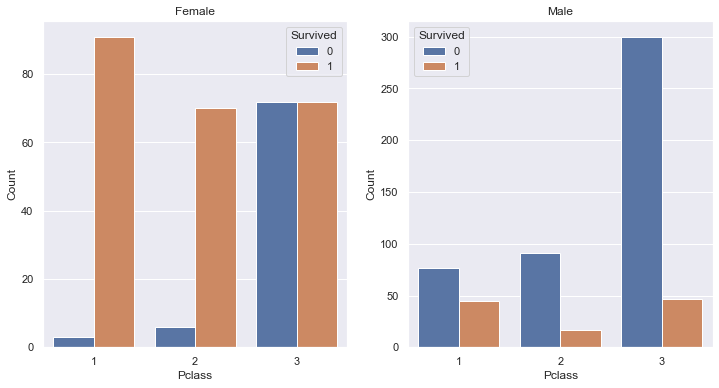

In [23]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
female_surv_barplot = sns.barplot(x='Pclass', y='Count', hue='Survived', data=female_pclass_surv, ax=axes[0])
male_surv_barplot = sns.barplot(x='Pclass', y='Count', hue='Survived', data=male_pclass_surv, ax=axes[1])

female_surv_barplot.set_title('Female')
male_surv_barplot.set_title('Male')

## Correlation heatmap

<AxesSubplot:>

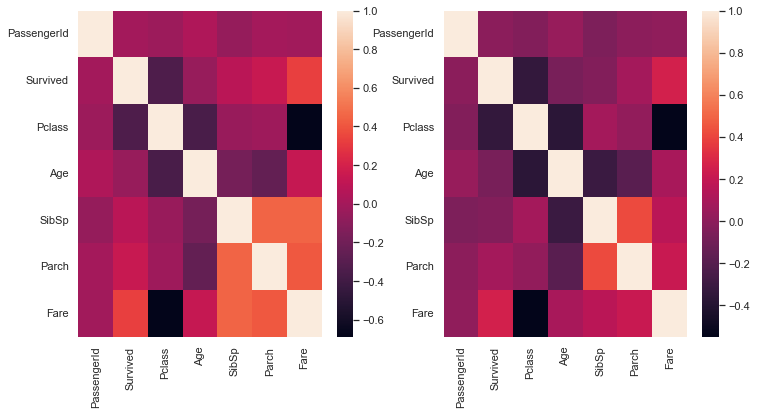

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.heatmap(data=titanic_train.corr(method='spearman'), ax=axes[0])
sns.heatmap(data=titanic_train.corr(), ax=axes[1])

# fillna() Age with median

In [24]:
age_median = titanic_train['Age'].median()
age_median

28.0

In [25]:
titanic_train['Age'].fillna(value=age_median, inplace=True)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
